# 🧮  Visualize model metrics

This notebook was forked from the [SymbNET metabolic modeling training materials](https://github.com/franciscozorrilla/SymbNET):

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6323607.svg)](https://doi.org/10.5281/zenodo.6323607)

You are now familiar with how CarveMe works, next we will inspect the output GEMs. This notebook loads the models and plots the number of genes, reactions, and metabolites for the different communities. You may follow along passively on GitHub or launch the jupyter notebook from your terminal to interactively run through each code chunk. To do so, launch jupyter from your terminal:
```bash
$ cd $ROOT
$ jupyter notebook --browser firefox
```
This should launch a browser window where you can navigate to the `SymbNET/scripts/` folder and click on the appropriate file to launch this notebook interactively.

Note: this script is forked from Daniel's [carveme_paper repo](https://github.com/cdanielmachado/carveme_paper/blob/master/notebooks/Model%20summary.ipynb).

### Load libraries

In [3]:
%matplotlib inline

In [4]:
from framed import load_cbmodel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('white')

## 🍰 Load models

In [13]:
### Strains
organisms = ['A. muciniphila','A. putredinis','B. adolescentis','B. animalis subsp. lactis BI-07','B. clarus','B. crossotus','B. dorei','B. eggerthii','B. fragilis','B. hansenii','B. longum subsp. infantis','B. thetaiotaomicron','B. uniformis','B. vulgatus','C. bolteae','C. comes','C. perfringens','C. ramosum','C. saccharolyticum','D. formicigenerans','E. coli IAI1','E. eligens','E. lenta','E. limosum','E. rectale','E. siraeum','F. nucleatum subsp. nucleatum','L. gasseri','L. lactis','L. paracasei','L. plantarum','P. capillosus','P. copri','P. distasonis','P. melaninogenica','R. bromii','R. gnavus','R. intestinalis','S. parasanguinis','S. salivarius']

### Load M3 gapfilled models
m3_gapfilled = {
    'A. muciniphila': ('../models/M3_gapfilled/NT5021.xml', 'fbc2'),
    'A. putredinis': ('../models/M3_gapfilled/NT5014.xml', 'fbc2'),
    'B. adolescentis': ('../models/M3_gapfilled/NT5022.xml', 'fbc2'),
    'B. animalis subsp. lactis BI-07': ('../models/M3_gapfilled/NT5044.xml', 'fbc2'),
    'B. clarus': ('../models/M3_gapfilled/NT5052.xml', 'fbc2'),
    'B. crossotus': ('../models/M3_gapfilled/NT5013.xml', 'fbc2'),
    'B. dorei': ('../models/M3_gapfilled/NT5049.xml', 'fbc2'),
    'B. eggerthii': ('../models/M3_gapfilled/NT5051.xml', 'fbc2'),
    'B. fragilis': ('../models/M3_gapfilled/NT5003.xml', 'fbc2'),
    'B. hansenii': ('../models/M3_gapfilled/NT5005.xml', 'fbc2'),
    'B. longum subsp. infantis': ('../models/M3_gapfilled/NT5023.xml', 'fbc2'),
    'B. thetaiotaomicron': ('../models/M3_gapfilled/NT5004.xml', 'fbc2'),
    'B. uniformis': ('../models/M3_gapfilled/NT5002.xml', 'fbc2'),
    'B. vulgatus': ('../models/M3_gapfilled/NT5001.xml', 'fbc2'),
    'C. bolteae': ('../models/M3_gapfilled/NT5026.xml', 'fbc2'),
    'C. comes': ('../models/M3_gapfilled/NT5048.xml', 'fbc2'),
    'C. perfringens': ('../models/M3_gapfilled/NT5032.xml', 'fbc2'),
    'C. ramosum': ('../models/M3_gapfilled/NT5006.xml', 'fbc2'),
    'C. saccharolyticum': ('../models/M3_gapfilled/NT5037.xml', 'fbc2'),
    'D. formicigenerans': ('../models/M3_gapfilled/NT5076.xml', 'fbc2'),
    'E. coli IAI1': ('../models/M3_gapfilled/NT5077.xml', 'fbc2'),
    'E. eligens': ('../models/M3_gapfilled/NT5075.xml', 'fbc2'),
    'E. lenta': ('../models/M3_gapfilled/NT5024.xml', 'fbc2'),
    'E. limosum': ('../models/M3_gapfilled/NT5068.xml', 'fbc2'),
    'E. rectale': ('../models/M3_gapfilled/NT5009.xml', 'fbc2'),
    'E. siraeum': ('../models/M3_gapfilled/NT5040.xml', 'fbc2'),
    'F. nucleatum subsp. nucleatum': ('../models/M3_gapfilled/NT5025.xml', 'fbc2'),
    'L. gasseri': ('../models/M3_gapfilled/NT5007.xml', 'fbc2'),
    'L. lactis': ('../models/M3_gapfilled/YK0001.xml', 'fbc2'),
    'L. paracasei': ('../models/M3_gapfilled/NT5042.xml', 'fbc2'),
    'L. plantarum': ('../models/M3_gapfilled/YK0002.xml', 'fbc2'),
    'P. capillosus': ('../models/M3_gapfilled/NT5008.xml', 'fbc2'),
    'P. copri': ('../models/M3_gapfilled/NT5019.xml', 'fbc2'),
    'P. distasonis': ('../models/M3_gapfilled/NT5074.xml', 'fbc2'),
    'P. melaninogenica': ('../models/M3_gapfilled/NT5020.xml', 'fbc2'),
    'R. bromii': ('../models/M3_gapfilled/NT5045.xml', 'fbc2'),
    'R. gnavus': ('../models/M3_gapfilled/NT5046.xml', 'fbc2'),
    'R. intestinalis': ('../models/M3_gapfilled/NT5011.xml', 'fbc2'),
    'S. parasanguinis': ('../models/M3_gapfilled/NT5072.xml', 'fbc2'),
    'S. salivarius': ('../models/M3_gapfilled/NT5038.xml', 'fbc2')
}

for label, (model_file, flavor) in m3_gapfilled.items():
    m3_gapfilled[label] =  load_cbmodel(model_file, flavor=flavor)


### Load non-gapfilled models
no_gapfill = {
    'A. muciniphila': ('../models/no_gapfill/NT5021.xml', 'fbc2'),
    'A. putredinis': ('../models/no_gapfill/NT5014.xml', 'fbc2'),
    'B. adolescentis': ('../models/no_gapfill/NT5022.xml', 'fbc2'),
    'B. animalis subsp. lactis BI-07': ('../models/no_gapfill/NT5044.xml', 'fbc2'),
    'B. clarus': ('../models/no_gapfill/NT5052.xml', 'fbc2'),
    'B. crossotus': ('../models/no_gapfill/NT5013.xml', 'fbc2'),
    'B. dorei': ('../models/no_gapfill/NT5049.xml', 'fbc2'),
    'B. eggerthii': ('../models/no_gapfill/NT5051.xml', 'fbc2'),
    'B. fragilis': ('../models/no_gapfill/NT5003.xml', 'fbc2'),
    'B. hansenii': ('../models/no_gapfill/NT5005.xml', 'fbc2'),
    'B. longum subsp. infantis': ('../models/no_gapfill/NT5023.xml', 'fbc2'),
    'B. thetaiotaomicron': ('../models/no_gapfill/NT5004.xml', 'fbc2'),
    'B. uniformis': ('../models/no_gapfill/NT5002.xml', 'fbc2'),
    'B. vulgatus': ('../models/no_gapfill/NT5001.xml', 'fbc2'),
    'C. bolteae': ('../models/no_gapfill/NT5026.xml', 'fbc2'),
    'C. comes': ('../models/no_gapfill/NT5048.xml', 'fbc2'),
    'C. perfringens': ('../models/no_gapfill/NT5032.xml', 'fbc2'),
    'C. ramosum': ('../models/no_gapfill/NT5006.xml', 'fbc2'),
    'C. saccharolyticum': ('../models/no_gapfill/NT5037.xml', 'fbc2'),
    'D. formicigenerans': ('../models/no_gapfill/NT5076.xml', 'fbc2'),
    'E. coli IAI1': ('../models/no_gapfill/NT5077.xml', 'fbc2'),
    'E. eligens': ('../models/no_gapfill/NT5075.xml', 'fbc2'),
    'E. lenta': ('../models/no_gapfill/NT5024.xml', 'fbc2'),
    'E. limosum': ('../models/no_gapfill/NT5068.xml', 'fbc2'),
    'E. rectale': ('../models/no_gapfill/NT5009.xml', 'fbc2'),
    'E. siraeum': ('../models/no_gapfill/NT5040.xml', 'fbc2'),
    'F. nucleatum subsp. nucleatum': ('../models/no_gapfill/NT5025.xml', 'fbc2'),
    'L. gasseri': ('../models/no_gapfill/NT5007.xml', 'fbc2'),
    'L. lactis': ('../models/no_gapfill/YK0001.xml', 'fbc2'),
    'L. paracasei': ('../models/no_gapfill/NT5042.xml', 'fbc2'),
    'L. plantarum': ('../models/no_gapfill/YK0002.xml', 'fbc2'),
    'P. capillosus': ('../models/no_gapfill/NT5008.xml', 'fbc2'),
    'P. copri': ('../models/no_gapfill/NT5019.xml', 'fbc2'),
    'P. distasonis': ('../models/no_gapfill/NT5074.xml', 'fbc2'),
    'P. melaninogenica': ('../models/no_gapfill/NT5020.xml', 'fbc2'),
    'R. bromii': ('../models/no_gapfill/NT5045.xml', 'fbc2'),
    'R. gnavus': ('../models/no_gapfill/NT5046.xml', 'fbc2'),
    'R. intestinalis': ('../models/no_gapfill/NT5011.xml', 'fbc2'),
    'S. parasanguinis': ('../models/no_gapfill/NT5072.xml', 'fbc2'),
    'S. salivarius': ('../models/no_gapfill/NT5038.xml', 'fbc2')
}
 
for label, (model_file, flavor) in no_gapfill.items():
    no_gapfill[label] =  load_cbmodel(model_file, flavor=flavor)
    
data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = m3_gapfilled[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'm3_gapfilled', n_genes, n_enzrxns, n_mets))
    
    model = no_gapfill[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'no_gapfill', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])


## 📪 Plot metrics

<ipython-input-12-03df8391e6c8>:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


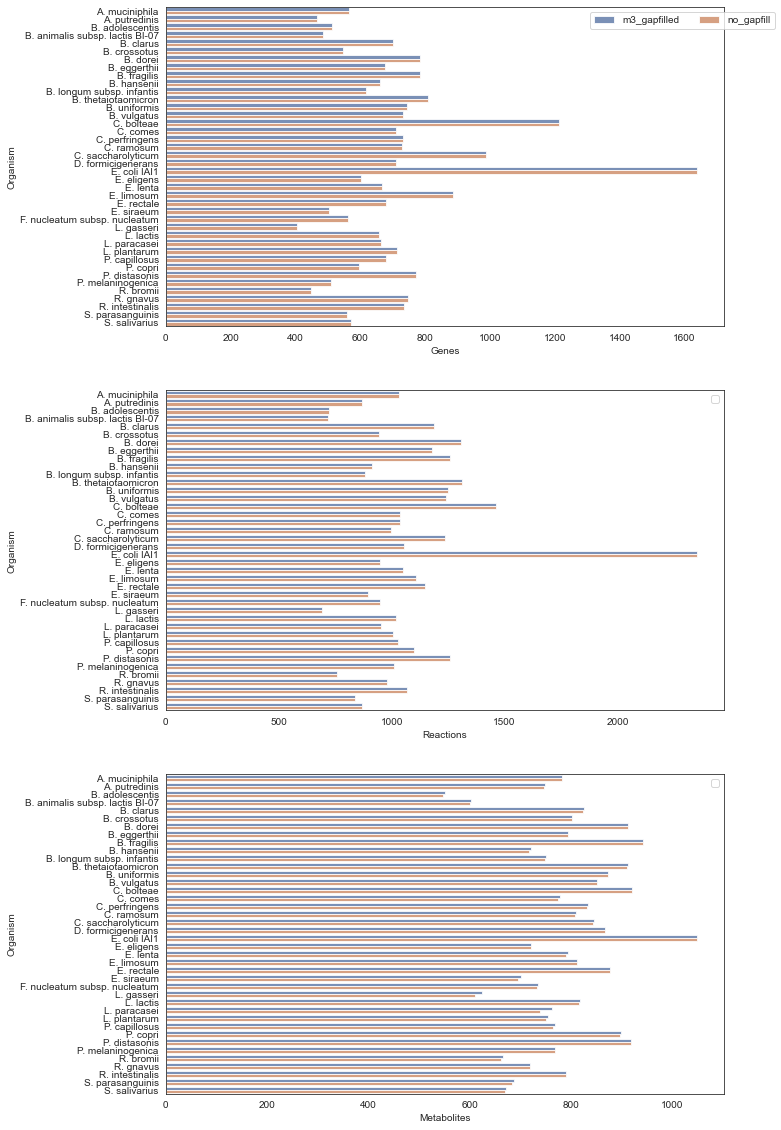

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=False, figsize=(10,20))

sns.barplot(x="Genes", y="Organism", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_xlabel('Genes')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


sns.barplot(x="Reactions", y="Organism", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
ax2.set_xlabel('Reactions')
ax2.legend([])

res = sns.barplot(x="Metabolites", y="Organism", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_xlabel('Metabolites')
ax3.legend([])

plt.savefig('../plots/model_summary.png', dpi=300)

## 🔬 Discussion questions

 - Approximately how many genes do you expect to find in a typical prokaryotic genome? What percentage do you expect to be metabolism encoding?
 - Are the number of metabolites, reactions, and genes in your community's models comparable to other metabolic reconstructions?
 - Is there variation in the metabolism of conspecific models reconstructed from different metagenomes?